## 导入包

In [1]:
import csv
import requests
import time
from bs4 import BeautifulSoup

with open(r'.\北上广深历史天气.csv', mode='w+', newline='', encoding='utf-8') as f:
    csv_writer = csv.writer(f)
    csv_writer.writerow(['城市', '日期', '最高温', '最低温', '天气', '风力风向', '空气质量指数'])
    city_dict = {'北京': 54511, '上海': 58362, '广州': 59287, '深圳': 59493}
    for city in city_dict:
        #time.sleep(1000)
        for year in range(2020, 2023):
            for month in range(1, 13):
                url = f'https://tianqi.2345.com/Pc/GetHistory' \
                      f'?areaInfo%5BareaId%5D={city_dict[city]}' \
                      f'&areaInfo%5BareaType%5D=2&date%5Byear%5D={year}' \
                      f'&date%5Bmonth%5D={month}'
                response = requests.get(url=url)
                json_data = response.json()
                html_data = json_data['data']
                page = BeautifulSoup(html_data, "html.parser")
                table = page.find("table", attrs={"class": "history-table"})
                trs = table.find_all("tr")
                for it in trs[1:]:
                    td = it.find_all('td')
                    e1 = td[0].text  # 日期
                    e2 = td[1].text  # 最高温
                    e3 = td[2].text  # 最低温
                    e4 = td[3].text  # 天气
                    e5 = td[4].text  # 风力风向
                    e6 = td[5].text  # 空气质量指数
                    lst = [city, e1, e2, e3, e4, e5, e6]
                    #print(lst)
                    csv_writer.writerow(lst)

In [2]:
# 导入包
import numpy as np 
import pandas as pd
import time  
import jieba
import datetime
from pyecharts import options as opts
from pyecharts.charts import *
from pyecharts.commons.utils import JsCode


from pyecharts.globals import CurrentConfig, NotebookType, OnlineHostType
CurrentConfig.ONLINE_HOST = OnlineHostType.NOTEBOOK_HOST

# 配置对应的环境类型
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_NOTEBOOK
CurrentConfig.ONLINE_HOST='https://assets.pyecharts.org/assets/'


## 读入数据

In [3]:
data = pd.read_csv('北上广深历史天气.csv')
data

,城市,日期,最高温,最低温,天气,风力风向,空气质量指数
0,北京,2020-01-01 周三,0°,-9°,晴,东北风1级,53 良
1,北京,2020-01-02 周四,4°,-8°,多云,西北风1级,74 良
2,北京,2020-01-03 周五,7°,-5°,晴,西北风1级,72 良
3,北京,2020-01-04 周六,9°,-5°,晴,东北风1级,59 良
4,北京,2020-01-05 周日,2°,-3°,阴~小雪,东北风1级,79 良
...,...,...,...,...,...,...,...
4379,深圳,2022-12-27 周二,21°,12°,晴,东风2级,-
4380,深圳,2022-12-28 周三,20°,10°,多云~阴,东北风2级,-
4381,深圳,2022-12-29 周四,17°,9°,多云~晴,东北风3级,-
4382,深圳,2022-12-30 周五,16°,11°,多云~晴,东北风3级,-


## 数据预览

In [4]:
data.sample(5)

,城市,日期,最高温,最低温,天气,风力风向,空气质量指数
3218,广州,2022-10-23 周日,34°,20°,晴,东北风2级,58 良
2992,广州,2022-03-11 周五,27°,16°,多云,东南风2级,56 良
2284,广州,2020-04-02 周四,19°,17°,阵雨~雷阵雨,东北风2级,44 优
3526,深圳,2020-08-26 周三,32°,25°,阴~大雨,西南风3级,27 优
3841,深圳,2021-07-07 周三,31°,27°,中雨~多云,东南风3级,26 优


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   城市      4384 non-null   object
 1   日期      4384 non-null   object
 2   最高温     4384 non-null   object
 3   最低温     4384 non-null   object
 4   天气      4384 non-null   object
 5   风力风向    4384 non-null   object
 6   空气质量指数  4384 non-null   object
dtypes: object(7)
memory usage: 239.9+ KB


# 把数据写入保存到数据库中

In [6]:
import pymysql
import pandas as pd
from sqlalchemy import create_engine

# 数据库信息
mysql_setting = {
    'host': 'localhost',
    'port': 3306,
    'user': 'root',
    'passwd': '202899318',
    # 数据库名称
    'db': 'ksh',
    'charset': 'utf8'
}
# 表名
# 如果不存在表，则自动创建
table_name = 'weather'
# 文件路径
path = r'北上广深历史天气.csv'
data2 = pd.read_csv(path,encoding='utf-8')
print(data2)
engine = create_engine("mysql+pymysql://{user}:{passwd}@{host}:{port}/{db}".format(**mysql_setting), max_overflow=5)
data2.to_sql(table_name,engine,index=False,if_exists='replace',)
print('导入成功...')

      城市             日期  最高温  最低温    天气   风力风向 空气质量指数
0     北京  2020-01-01 周三   0°  -9°     晴  东北风1级   53 良
1     北京  2020-01-02 周四   4°  -8°    多云  西北风1级   74 良
2     北京  2020-01-03 周五   7°  -5°     晴  西北风1级   72 良
3     北京  2020-01-04 周六   9°  -5°     晴  东北风1级   59 良
4     北京  2020-01-05 周日   2°  -3°  阴~小雪  东北风1级   79 良
...   ..            ...  ...  ...   ...    ...    ...
4379  深圳  2022-12-27 周二  21°  12°     晴   东风2级      -
4380  深圳  2022-12-28 周三  20°  10°  多云~阴  东北风2级      -
4381  深圳  2022-12-29 周四  17°   9°  多云~晴  东北风3级      -
4382  深圳  2022-12-30 周五  16°  11°  多云~晴  东北风3级      -
4383  深圳  2022-12-31 周六  18°  12°  晴~多云  东北风3级   46 优

[4384 rows x 7 columns]
导入成功...


In [7]:
#查看数据库数据
import pymysql
import pandas as pd
conn=pymysql.connect(host='localhost',user='root',password='202899318',database='ksh',charset='utf8')
sql = "SELECT * FROM weather"
data1 = pd.read_sql(sql, conn)
print(data1)

      城市             日期  最高温  最低温    天气   风力风向 空气质量指数
0     北京  2020-01-01 周三   0°  -9°     晴  东北风1级   53 良
1     北京  2020-01-02 周四   4°  -8°    多云  西北风1级   74 良
2     北京  2020-01-03 周五   7°  -5°     晴  西北风1级   72 良
3     北京  2020-01-04 周六   9°  -5°     晴  东北风1级   59 良
4     北京  2020-01-05 周日   2°  -3°  阴~小雪  东北风1级   79 良
...   ..            ...  ...  ...   ...    ...    ...
4379  深圳  2022-12-27 周二  21°  12°     晴   东风2级      -
4380  深圳  2022-12-28 周三  20°  10°  多云~阴  东北风2级      -
4381  深圳  2022-12-29 周四  17°   9°  多云~晴  东北风3级      -
4382  深圳  2022-12-30 周五  16°  11°  多云~晴  东北风3级      -
4383  深圳  2022-12-31 周六  18°  12°  晴~多云  东北风3级   46 优

[4384 rows x 7 columns]


C:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


# 各地区空气质量等级展示

In [8]:
#切割空气质量
data[['空气质量指数','等级']] = data['空气质量指数'].str.split(' ',expand=True,n=1)
data.head()

,城市,日期,最高温,最低温,天气,风力风向,空气质量指数,等级
0,北京,2020-01-01 周三,0°,-9°,晴,东北风1级,53,良
1,北京,2020-01-02 周四,4°,-8°,多云,西北风1级,74,良
2,北京,2020-01-03 周五,7°,-5°,晴,西北风1级,72,良
3,北京,2020-01-04 周六,9°,-5°,晴,东北风1级,59,良
4,北京,2020-01-05 周日,2°,-3°,阴~小雪,东北风1级,79,良


In [9]:
#获取各地区的空气质量数据
data_beijing=data[(data['城市'] == '北京')]
data_guangzhou=data[(data['城市'] == '广州')]
data_shanghai=data[(data['城市'] == '上海')]
data_shenzheng=data[(data['城市'] == '深圳')]
#查看数据缺失情况
data.isnull().sum()

城市          0
日期          0
最高温         0
最低温         0
天气          0
风力风向        0
空气质量指数      0
等级        120
dtype: int64

In [10]:
#数据删除没用的空值列然后验证是否去除成功
data_beijing.dropna(axis='index', how='any', inplace=True)
data_beijing.isnull().sum()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18596\2624826825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_beijing.dropna(axis='index', how='any', inplace=True)


城市        0
日期        0
最高温       0
最低温       0
天气        0
风力风向      0
空气质量指数    0
等级        0
dtype: int64

In [11]:
#同理以上删除对应的广州上海和深圳的空值行
data_guangzhou.dropna(axis='index', how='any', inplace=True)
data_shanghai.dropna(axis='index', how='any', inplace=True)
data_shenzheng.dropna(axis='index', how='any', inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18596\1991498914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_guangzhou.dropna(axis='index', how='any', inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18596\1991498914.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_shanghai.dropna(axis='index', how='any', inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18596\1991498914.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

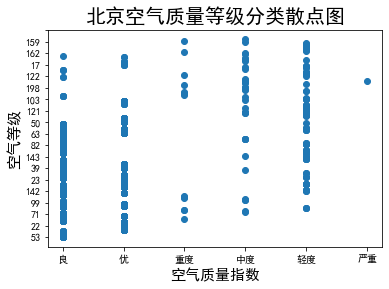

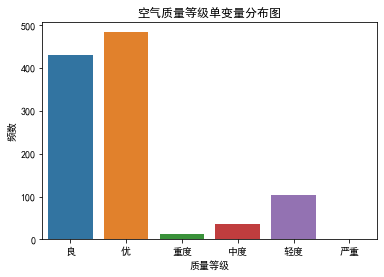

In [40]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
# 正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.family'] = 'sans-serif'
# 绘制北京空气质量等级分类散点图
plt.figure()
# 绘制散点图，x轴:等级，y轴：空气等级数据
plt.yticks(np.arange(0, 200, 10))
plt.scatter(x=data_beijing.等级, y=data_beijing.空气质量指数)
# 设定x轴标签和字体大小

plt.xlabel('空气质量指数', fontsize=15)
# 设定y轴标签和字体大小
plt.ylabel('空气等级', fontsize=15)
# 设定标题和字体大小
plt.title('北京空气质量等级分类散点图', fontsize=20)
# 显示图像
plt.show()
# 绘制空气质量等级单变量分布图
# 绘制以第7列为 x 轴
sn.countplot(x=data_beijing.columns[7], data=data_beijing)
# 设置标题为“空气质量等级单变量分布图”
plt.title("空气质量等级单变量分布图")
# 设置 x 轴标签为“质量等级”
plt.xlabel("质量等级")
# 设置 y 轴标签为“频数”
plt.ylabel("频数")
# 显示图像
plt.show()

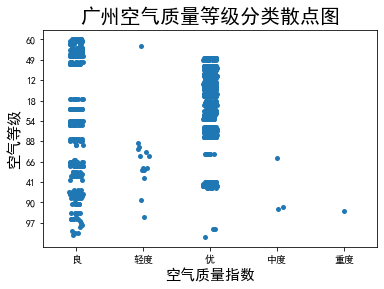

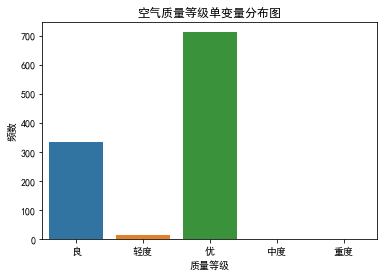

In [43]:
# 绘制广州空气质量等级分类散点图
plt.figure()
# 绘制散点图，x轴:等级，y轴：空气等级数据

sn.stripplot(x=data_guangzhou[data_guangzhou.columns[7]], y=data_guangzhou[data_guangzhou.columns[6]], data=data_guangzhou, jitter=True)
# 设定x轴标签和字体大小
plt.xlabel('空气质量指数', fontsize=15)
# 设定y轴标签和字体大小
plt.ylabel('空气等级', fontsize=15)
plt.yticks(np.arange(0, 100, 10))
# 设定标题和字体大小
plt.title('广州空气质量等级分类散点图', fontsize=20)
# 显示图形
plt.show()
# 绘制空气质量等级单变量分布图
# 绘制以第7列为 x 轴
sn.countplot(x=data_beijing.columns[7], data=data_guangzhou)
# 设置标题为“空气质量等级单变量分布图”
plt.title("空气质量等级单变量分布图")
# 设置 x 轴标签为“质量等级”
plt.xlabel("质量等级")
# 设置 y 轴标签为“频数”
plt.ylabel("频数")
# 显示图像
plt.show()

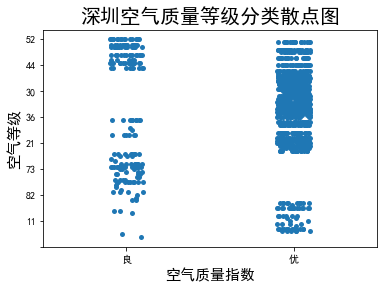

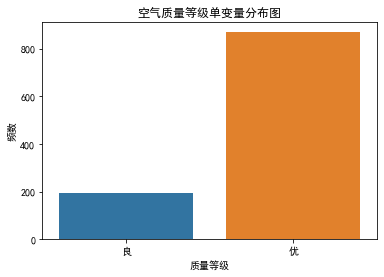

In [46]:
# 绘制深圳空气质量等级分类散点图
plt.figure()
# 绘制散点图，x轴:等级，y轴：空气等级数据
sn.stripplot(x=data_shenzheng[data_shenzheng.columns[7]], y=data_shenzheng[data_shenzheng.columns[6]], data=data_shenzheng, jitter=True)
# sn.stripplot(x=data_shanghai[data_shanghai.columns[7]], y=data_shanghai[data_shanghai.columns[6]], data=data_shanghai, jitter=True)
# 设定x轴标签和字体大小
plt.xlabel('空气质量指数', fontsize=15)
# 设定y轴标签和字体大小
plt.ylabel('空气等级', fontsize=15)
plt.yticks(np.arange(0, 90, 10))
# 设定标题和字体大小
plt.title('深圳空气质量等级分类散点图', fontsize=20)
# 显示图形
plt.show()
# 绘制空气质量等级单变量分布图
# 绘制以第7列为 x 轴
sn.countplot(x=data_beijing.columns[7], data=data_shenzheng)
# 设置标题为“空气质量等级单变量分布图”
plt.title("空气质量等级单变量分布图")
# 设置 x 轴标签为“质量等级”
plt.xlabel("质量等级")
# 设置 y 轴标签为“频数”
plt.ylabel("频数")
# 显示图像
plt.show()

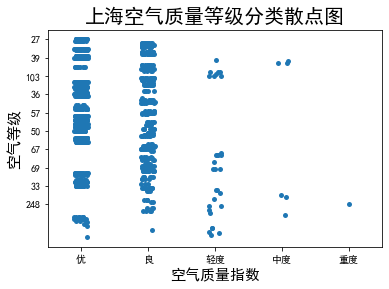

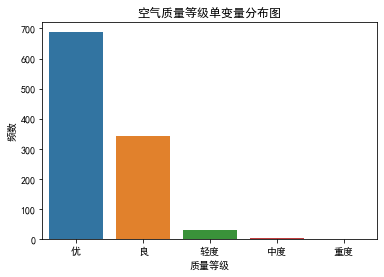

In [47]:
# 绘制上海空气质量等级分类散点图
plt.figure()
# 绘制散点图，x轴:等级，y轴：空气等级数据
sn.stripplot(x=data_shanghai[data_shanghai.columns[7]], y=data_shanghai[data_shanghai.columns[6]], data=data_shanghai, jitter=True)
# 设定x轴标签和字体大小
plt.xlabel('空气质量指数', fontsize=15)
# 设定y轴标签和字体大小
plt.ylabel('空气等级', fontsize=15)
plt.yticks(np.arange(0, 100, 10))
# 设定标题和字体大小
plt.title('上海空气质量等级分类散点图', fontsize=20)
# 显示图形
plt.show()
# 绘制空气质量等级单变量分布图
# 绘制以第7列为 x 轴
sn.countplot(x=data_beijing.columns[7], data=data_shanghai)
# 设置标题为“空气质量等级单变量分布图”
plt.title("空气质量等级单变量分布图")
# 设置 x 轴标签为“质量等级”
plt.xlabel("质量等级")
# 设置 y 轴标签为“频数”
plt.ylabel("频数")
# 显示图像
plt.show()

# 各地风级雷达图

In [16]:
#切割风力风向
data1[['风向','风力']] = data1['风力风向'].str.split('风',expand=True,n=1)
#去掉风力的“级”单位
import re
unit="级"
data1['风力']=[sub.replace(unit, "").strip() for sub in data1['风力']]
#把数据风力内的“微风代替成”等级的风力
data1['风力'].replace('微风','1',inplace=True)
data1.head()

,城市,日期,最高温,最低温,天气,风力风向,空气质量指数,风向,风力
0,北京,2020-01-01 周三,0°,-9°,晴,东北风1级,53 良,东北,1
1,北京,2020-01-02 周四,4°,-8°,多云,西北风1级,74 良,西北,1
2,北京,2020-01-03 周五,7°,-5°,晴,西北风1级,72 良,西北,1
3,北京,2020-01-04 周六,9°,-5°,晴,东北风1级,59 良,东北,1
4,北京,2020-01-05 周日,2°,-3°,阴~小雪,东北风1级,79 良,东北,1


In [17]:
#获取各地区的风力风向数据
data_beijing1=data1[(data1['城市'] == '北京')]
data_guangzhou1=data1[(data1['城市'] == '广州')]
data_shanghai1=data1[(data1['城市'] == '上海')]
data_shenzheng1=data1[(data1['城市'] == '深圳')]
data_beijing1

,城市,日期,最高温,最低温,天气,风力风向,空气质量指数,风向,风力
0,北京,2020-01-01 周三,0°,-9°,晴,东北风1级,53 良,东北,1
1,北京,2020-01-02 周四,4°,-8°,多云,西北风1级,74 良,西北,1
2,北京,2020-01-03 周五,7°,-5°,晴,西北风1级,72 良,西北,1
3,北京,2020-01-04 周六,9°,-5°,晴,东北风1级,59 良,东北,1
4,北京,2020-01-05 周日,2°,-3°,阴~小雪,东北风1级,79 良,东北,1
...,...,...,...,...,...,...,...,...,...
1091,北京,2022-12-27 周二,1°,-8°,晴,西北风4级,-,西北,4
1092,北京,2022-12-28 周三,3°,-8°,晴,西北风1级,-,西北,1
1093,北京,2022-12-29 周四,3°,-9°,晴,西北风2级,-,西北,2
1094,北京,2022-12-30 周五,4°,-8°,晴,西风1级,-,西,1


In [18]:
#查看数据缺失情况
data1.isnull().sum()

城市        0
日期        0
最高温       0
最低温       0
天气        0
风力风向      0
空气质量指数    0
风向        0
风力        0
dtype: int64

北京2020-2022年来的风玫瑰图


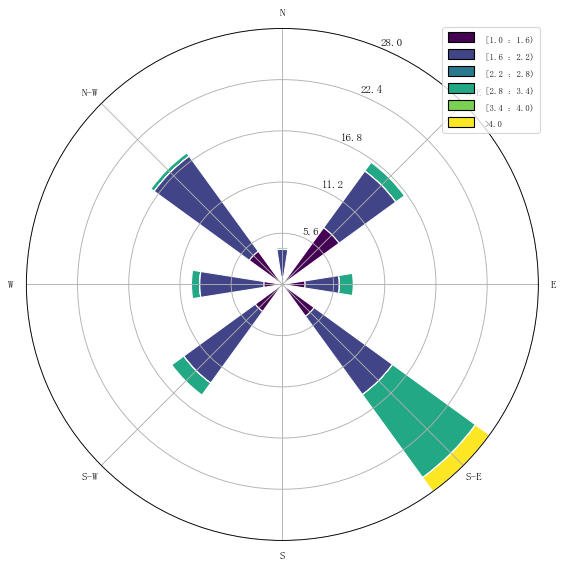

In [49]:
#  引用部分
import matplotlib.pyplot as plt  # 导入绘图模块
import pandas as pd  # 导入数据处理模块
import numpy as np  # 导入数据处理模块
import matplotlib
from windrose import WindroseAxes  # 导入风玫瑰图模块

matplotlib.rcParams['font.sans-serif'] = ['FangSong']  # 用仿宋字体显示中文
matplotlib.rcParams['axes.unicode_minus'] = False  # 正常显示负号的设置
print("北京2020-2022年来的风玫瑰图")
# 读取数据
data3 = data_beijing1
wind=list(data3['风向'])
for i in range(0,1096):  
    if wind[i] == "北":  
        wind[i] = '90' 
    elif wind[i] == "南": 
        wind[i] = '270'  
    elif wind[i] == "西":
        wind[i] = '180'  
    elif wind[i] == "东":
        wind[i] = '360'  
    elif wind[i] == "东北": 
        wind[i] = '45'  
    elif wind[i] == "西北":  
        wind[i] = '135'  
    elif wind[i] == "西南":  
        wind[i] = '225' 
    elif wind[i] == "东南":  
        wind[i] = '315'
data_wd = np.array(wind)  # 将风向转为ndarray矩阵-风向矩阵
data_ws = np.array(data3['风力'])  # 将风速转为ndarray矩阵-风速矩阵
data_ws = data_ws.astype(float)#字符转置
data_wd = data_wd.astype(float)
# 绘制风玫瑰图
ax = WindroseAxes.from_ax()  # 调用风玫瑰图模块绘图
ax.bar(data_wd,  # 设置风向数据
       data_ws,  # 设置风速数据
       nsector=16,  # 风向分为16个区间
       bins=6,  # 风速分档
       normed=True,
       opening=0.8,  # 设置射线夹角
       edgecolor='white',  # 设置边框颜色为白色
       alpha=1)  # 设置透明度

# 设置图例
ax.set_legend(loc='best', fontsize=12)  # 设置图例位置
plt.show()

### 分割日期/星期

In [ ]:
data[['日期','星期']] = data['日期'].str.split(' ',expand=True,n=1)

### 去除多余字符

In [ ]:
data[['最高温','最低温']] = data[['最高温','最低温']].apply(lambda x: x.str.replace('°',''))
data.head()

### 计算下雪天气

In [ ]:
data.loc[data['天气'].str.contains('雪'),'下雪吗']='是'
data.fillna('否',inplace=True)

### 分割日期时间

In [ ]:
data['日期'] = pd.to_datetime(data['日期'])
data[['最高温','最低温']] = data[['最高温','最低温']].astype('int')

In [ ]:
data['年份'] = data['日期'].dt.year
data['月份'] = data['日期'].dt.month
data['日'] = data['日期'].dt.day
# 预览
data.sample(5)

## 各城市初雪的时间

In [ ]:
s_data = data[data['下雪吗']=='是']
s_data[(s_data['月份']>=9)].groupby('年份').first().reset_index()

## 各城市下雪天气分布

In [ ]:
s_data.groupby(['城市','年份'])['日期'].count().to_frame('下雪天数').reset_index()

## 做透视表

In [ ]:
data_bj = data[(data['年份'] == 2021) & (data['城市'] == '北京')]
data_bj = data_bj.groupby(['月份','天气'], as_index=False)['日期'].count()

In [ ]:

data_pivot =  pd.pivot(data_bj,
                values='日期',
                index='月份',
                columns='天气')
data_pivot = data_pivot.astype('float')
# 按照 索引年月倒序排序
data_pivot.sort_index(ascending=False,inplace=True)

data_pivot

## 北上广深2022年10月份天气热力图分布

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

#设置全局默认字体 为 雅黑
plt.rcParams['font.family'] = ['Microsoft YaHei'] 
# 设置全局轴标签字典大小
plt.rcParams["axes.labelsize"] = 14  
# 设置背景
sns.set_style("darkgrid",{"font.family":['Microsoft YaHei', 'SimHei']})  
# 设置画布长宽 和 dpi
plt.figure(figsize=(18,8),dpi=100)
# 自定义色卡
cmap = mcolors.LinearSegmentedColormap.from_list("n",['#95B359','#D3CF63','#E0991D','#D96161','#A257D0','#7B1216']) 
# 绘制热力图

ax = sns.heatmap(data_pivot, cmap=cmap, vmax=30, 
                 annot=True, # 热力图上显示数值
                 linewidths=0.5,
                ) 
# 将x轴刻度放在最上面
ax.xaxis.set_ticks_position('top')
plt.xticks(rotation=-35,fontsize=8)
plt.title('北京最近10个月天气分布',fontsize=16) #图片标题文本和字体大小
plt.show()

In [ ]:
data_gz= data[(data['年份'] == 2021) & (data['城市'] == '广州')]
data_gz = data_gz.groupby(['月份','天气'], as_index=False)['日期'].count()
data_sz= data[(data['年份'] == 2021) & (data['城市'] == '深圳')]
data_sz = data_sz.groupby(['月份','天气'], as_index=False)['日期'].count()
data_sh= data[(data['年份'] == 2021) & (data['城市'] == '上海')]
data_sh = data_sh.groupby(['月份','天气'], as_index=False)['日期'].count()

In [ ]:
data_pivot_sz =  pd.pivot(data_sz,
                values='日期',
                index='月份',
                columns='天气')
data_pivot_sz = data_pivot_sz.astype('float')
# 按照 索引年月倒序排序
data_pivot_sz.sort_index(ascending=False,inplace=True)

#设置全局默认字体 为 雅黑
plt.rcParams['font.family'] = ['Microsoft YaHei'] 
# 设置全局轴标签字典大小
plt.rcParams["axes.labelsize"] = 14  
# 设置背景
sns.set_style("darkgrid",{"font.family":['Microsoft YaHei', 'SimHei']})  
# 设置画布长宽 和 dpi
plt.figure(figsize=(18,8),dpi=100)
# 自定义色卡
cmap = mcolors.LinearSegmentedColormap.from_list("n",['#95B359','#D3CF63','#E0991D','#D96161','#A257D0','#7B1216']) 
# 绘制热力图

ax_sz = sns.heatmap(data_pivot_sz, cmap=cmap, vmax=31, 
                 annot=True, # 热力图上显示数值
                 linewidths=0.5,
                ) 
# 将x轴刻度放在最上面
ax_sz.xaxis.set_ticks_position('top') 
plt.xticks(rotation=-35,fontsize=8)
plt.title('深圳最近10个月天气分布',fontsize=16) #图片标题文本和字体大小
plt.show()

In [ ]:
data_pivot_gz =  pd.pivot(data_gz,
                values='日期',
                index='月份',
                columns='天气')
data_pivot_gz = data_pivot_gz.astype('float')
# 按照 索引年月倒序排序
data_pivot_gz.sort_index(ascending=False,inplace=True)

#设置全局默认字体 为 雅黑
plt.rcParams['font.family'] = ['Microsoft YaHei'] 
# 设置全局轴标签字典大小
plt.rcParams["axes.labelsize"] = 14  
# 设置背景
sns.set_style("darkgrid",{"font.family":['Microsoft YaHei', 'SimHei']})  
# 设置画布长宽 和 dpi
plt.figure(figsize=(18,8),dpi=100)
# 自定义色卡
cmap = mcolors.LinearSegmentedColormap.from_list("n",['#95B359','#D3CF63','#E0991D','#D96161','#A257D0','#7B1216']) 
# 绘制热力图

ax_sz = sns.heatmap(data_pivot_gz, cmap=cmap, vmax=31, 
                 annot=True, # 热力图上显示数值
                 linewidths=0.5,
                ) 
# 将x轴刻度放在最上面
ax_sz.xaxis.set_ticks_position('top') 
plt.xticks(rotation=-35,fontsize=8)
plt.title('广州最近10个月天气分布',fontsize=16) #图片标题文本和字体大小
plt.show()

In [ ]:
data_pivot_sh =  pd.pivot(data_sh,
                values='日期',
                index='月份',
                columns='天气')
data_pivot_sh = data_pivot_sh.astype('float')
# 按照 索引年月倒序排序
data_pivot_sh.sort_index(ascending=False,inplace=True)

#设置全局默认字体 为 雅黑
plt.rcParams['font.family'] = ['Microsoft YaHei'] 
# 设置全局轴标签字典大小
plt.rcParams["axes.labelsize"] = 14  
# 设置背景
sns.set_style("darkgrid",{"font.family":['Microsoft YaHei', 'SimHei']})  
# 设置画布长宽 和 dpi
plt.figure(figsize=(18,8),dpi=100)
# 自定义色卡
cmap = mcolors.LinearSegmentedColormap.from_list("n",['#95B359','#D3CF63','#E0991D','#D96161','#A257D0','#7B1216']) 
# 绘制热力图

ax_sz = sns.heatmap(data_pivot_sh, cmap=cmap, vmax=31, 
                 annot=True, # 热力图上显示数值
                 linewidths=0.5,
                ) 
# 将x轴刻度放在最上面
ax_sz.xaxis.set_ticks_position('top') 
plt.xticks(rotation=-35,fontsize=8)
plt.title('上海最近10个月天气分布',fontsize=16) #图片标题文本和字体大小
plt.show()

In [ ]:
data_gz = data[(data['城市']=='广州') & (data['年份'] == 2022)]
# data_gz['日期'] = pd.to_datetime(data_gz.日期,format="%Y年%m月%d日")
data_gz['日期']=data_gz['日期'].map(lambda x:pd.to_datetime(x,format="%Y年%m月%d日"))
data_gz = data_gz.sort_values(by='日期',ascending=True)

## 广州2022年每日最高最低温度变化

In [ ]:
color0 = ['#FF76A2','#24ACE6']
color_js0 = """new echarts.graphic.LinearGradient(0, 1, 0, 0,
    [{offset: 0, color: '#FFC0CB'}, {offset: 1, color: '#ed1941'}], false)"""
color_js1 = """new echarts.graphic.LinearGradient(0, 1, 0, 0,
    [{offset: 0, color: '#FFFFFF'}, {offset: 1, color: '#009ad6'}], false)"""

tl = Timeline()
for i in range(0,len(data_gz)):
    coordy_high = list(data_gz['最高温'])[i]
    coordx = list(data_gz['日期'])[i]
    coordy_low = list(data_gz['最低温'])[i]
    x_max = list(data_gz['日期'])[i]+datetime.timedelta(days=10)
    y_max = int(max(list(data_gz['最高温'])[0:i+1]))+3
    y_min = int(min(list(data_gz['最低温'])[0:i+1]))-3
    title_date = list(data_gz['日期'])[i].strftime('%Y-%m-%d')
    c = (
        Line(
            init_opts=opts.InitOpts(
            theme='dark',
            #设置动画
            animation_opts=opts.AnimationOpts(animation_delay_update=800),#(animation_delay=1000, animation_easing="elasticOut"),
            #设置宽度、高度
            width='1500px',
            height='900px', )
        )
        .add_xaxis(list(data_gz['日期'])[0:i])
        .add_yaxis(
            series_name="",
            y_axis=list(data_gz['最高温'])[0:i], is_smooth=True,is_symbol_show=False,
            itemstyle_opts=opts.ItemStyleOpts(color=JsCode(color_js0)),

        )
        .add_yaxis(
            series_name="",
            y_axis=list(data_gz['最低温'])[0:i], is_smooth=True,is_symbol_show=False,
            itemstyle_opts=opts.ItemStyleOpts(color=JsCode(color_js1)),

        )
        .set_global_opts(
            title_opts=opts.TitleOpts("广州2022年每日最高最低温度变化\n\n{}".format(title_date),pos_left=330,padding=[30,20]),
            xaxis_opts=opts.AxisOpts(type_="time",max_=x_max),#, interval=10,min_=i-5,split_number=20,axistick_opts=opts.AxisTickOpts(length=2500),axisline_opts=opts.AxisLineOpts(linestyle_opts=opts.LineStyleOpts(color="grey"))
            yaxis_opts=opts.AxisOpts(min_=y_min,max_=y_max),#坐标轴颜色,axisline_opts=opts.AxisLineOpts(linestyle_opts=opts.LineStyleOpts(color="grey"))
        )
    )
    tl.add(c, "{}".format(list(data_gz['日期'])[i]))
    tl.add_schema(
        axis_type='time',
        play_interval=100,  # 表示播放的速度
        pos_bottom="-29px",
        is_loop_play=False, # 是否循环播放
        width="780px",
        pos_left='30px',
        is_auto_play=True,  # 是否自动播放。
        is_timeline_show=False)
tl.render_notebook()

In [ ]:
data_10 = data[(data['年份'] == 2022) & ( data['月份'] == 10)]
data_10.head()

## 北上广深10月份每日最高气温变化

In [ ]:

# 线条样式
linestyle_dic = { 'normal': {
                    'width': 4,  
                    'shadowColor': '#696969', 
                    'shadowBlur': 10,  
                    'shadowOffsetY': 10,  
                    'shadowOffsetX': 10,  
                    }
                }
    
timeline = Timeline(init_opts=opts.InitOpts(width='980px',height='600px'))


bj, gz, sh, sz= [], [], [], []
all_max = []
x_data = data_10[data_10['城市'] == '北京']['日'].tolist()
for d_time in range(len(x_data)):
    bj.append(data_10[(data_10['日'] == x_data[d_time]) & (data_10['城市']=='北京')]["最高温"].values.tolist()[0])
    gz.append(data_10[(data_10['日'] == x_data[d_time]) & (data_10['城市']=='广州')]["最高温"].values.tolist()[0])
    sh.append(data_10[(data_10['日'] == x_data[d_time]) & (data_10['城市']=='上海')]["最高温"].values.tolist()[0])
    sz.append(data_10[(data_10['日'] == x_data[d_time]) & (data_10['城市']=='深圳')]["最高温"].values.tolist()[0])
    
    line = (
        Line(init_opts=opts.InitOpts(width='980px',height='600px'))
        .add_xaxis(
            x_data,
                  )
        .add_yaxis(
            '北京',
            bj,
            symbol_size=5,
            is_smooth=True,
            is_hover_animation=True,
            label_opts=opts.LabelOpts(is_show=False),
        )
  
        .add_yaxis(
            '广州',
            gz,
            symbol_size=5,
            is_smooth=True,
            is_hover_animation=True,
            label_opts=opts.LabelOpts(is_show=False),
        )
 
        .add_yaxis(
            '上海',
            sh,
#             symbol_size=5,
            is_smooth=True,
#             is_hover_animation=True,
            label_opts=opts.LabelOpts(is_show=False),
            
        )
 
        .add_yaxis(
            '深圳',
            sz,
            symbol_size=5,
            is_smooth=True,
            is_hover_animation=True,
            label_opts=opts.LabelOpts(is_show=False),
            
        )
        
        .set_series_opts(linestyle_opts=linestyle_dic)
        .set_global_opts(
            title_opts=opts.TitleOpts(
                title='北上广深10月份最高气温变化趋势',
                pos_left='center',
                pos_top='2%',
                title_textstyle_opts=opts.TextStyleOpts(color='#DC143C', font_size=20)),
            
            tooltip_opts=opts.TooltipOpts(
                trigger="axis",
                axis_pointer_type="cross",
                background_color="rgba(245, 245, 245, 0.8)",
                border_width=1,
                border_color="#ccc",
                textstyle_opts=opts.TextStyleOpts(color="#000"),
        ),
            xaxis_opts=opts.AxisOpts(
                axislabel_opts=opts.LabelOpts(font_size=14, color='red'),
                axisline_opts=opts.AxisLineOpts(is_show=True,
                linestyle_opts=opts.LineStyleOpts(width=2, color='#DB7093')),
#                 is_show = False
            ),
                
            
            yaxis_opts=opts.AxisOpts(
                name='最高气温',            
                is_scale=True,
#                 min_= int(min([gz[d_time],sh[d_time],sz[d_time],bj[d_time]])) - 10,
                max_= int(max([gz[d_time],sh[d_time],sz[d_time],bj[d_time]])) + 10,
                name_textstyle_opts=opts.TextStyleOpts(font_size=16,font_weight='bold',color='#5470c6'),
                axislabel_opts=opts.LabelOpts(font_size=13,color='#5470c6'),
                splitline_opts=opts.SplitLineOpts(is_show=True, 
                                                  linestyle_opts=opts.LineStyleOpts(type_='dashed')),
                axisline_opts=opts.AxisLineOpts(is_show=True,
                                        linestyle_opts=opts.LineStyleOpts(width=2, color='#5470c6'))
            ),
            legend_opts=opts.LegendOpts(is_show=True, pos_right='1%', pos_top='2%',
                                        legend_icon='roundRect',orient = 'vertical'),
        ))
    
    timeline.add(line, '{}'.format(x_data[d_time]))

timeline.add_schema(
    play_interval=1000,          # 轮播速度
    is_timeline_show=True,      # 是否显示 timeline 组件
    is_auto_play=True,          # 是否自动播放
    pos_left="0",
    pos_right="0"
)
timeline.render_notebook()